<a href="https://colab.research.google.com/github/deomiredo/tryssh/blob/main/AI_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1. Import module yang dibutuhkan


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

2. Load Dataset


In [ ]:
imagePaths = 'drive/MyDrive/Artificial-Intelligence/Dataset/'
label_list = ['Seledri', 'Seledri_Edge', 'Sirih']
data = []
labels = []

In [ ]:
for label in label_list:
  for imagePath in glob.glob(imagePaths+label+'/*.jpg'):
    #print(imagePath)
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (32, 32)).flatten()
    data.append(image)
    labels.append(label)

In [ ]:
np.array(data).shape

(150, 3072)

3. Data Preprocessing

In [22]:
# ubah type data dari list menjadi array
# ubah nilai dari tiap pixel menjadi range [0..1]
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)

In [23]:
print(labels)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 

In [ ]:
# ubah nilai dari labels menjadi binary
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(labels)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 

4. Split Dataset

In [24]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=10)

In [26]:
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)

Ukuran data train = (120, 3072)
Ukuran data test = (30, 3072)


5. Build ANN Architecture

In [27]:
# buat ANN dengan arsitektur input layer (3072) - hidden layer (512) - hidden layer (1024) - output layer (2)
model = Sequential()
model.add(Dense(512, input_shape=(3072,), activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense(len(label_list), activation="softmax"))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 3075      
Total params: 2,101,763
Trainable params: 2,101,763
Non-trainable params: 0
_________________________________________________________________


In [29]:
# tentukan hyperparameter
lr = 0.01
max_epochs = 100
opt_funct = SGD(learning_rate=lr)

In [30]:
# compile arsitektur yang telah dibuat
model.compile(optimizer = opt_funct,
              loss = 'categorical_crossentropy',
              metrics = ["accuracy"]
              )

6. Train Model

In [31]:
# # H = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
# #           epochs=max_epochs, batch_size=32)
# H = model.fit(x_train, y_train, validation_data=(x_test, y_test),
#               epochs=max_epochs, batch_size=12)

H = model.fit(x_train, y_train, 
              validation_data = (x_test, y_test),
              epochs = max_epochs, 
              batch_size = 10)

Epoch 1/100
12/12 [==============================] - 1s 23ms/step - loss: 0.8445 - accuracy: 0.5417 - val_loss: 0.8241 - val_accuracy: 0.7000
Epoch 2/100
12/12 [==============================] - 0s 10ms/step - loss: 0.6884 - accuracy: 0.7750 - val_loss: 0.7055 - val_accuracy: 0.9667
Epoch 3/100
12/12 [==============================] - 0s 9ms/step - loss: 0.6408 - accuracy: 0.8500 - val_loss: 0.6186 - val_accuracy: 1.0000
Epoch 4/100
12/12 [==============================] - 0s 9ms/step - loss: 0.7264 - accuracy: 0.7667 - val_loss: 0.5877 - val_accuracy: 1.0000
Epoch 5/100
12/12 [==============================] - 0s 10ms/step - loss: 0.5786 - accuracy: 0.8417 - val_loss: 0.5773 - val_accuracy: 0.9667
Epoch 6/100
12/12 [==============================] - 0s 9ms/step - loss: 0.5166 - accuracy: 0.9083 - val_loss: 0.8221 - val_accuracy: 0.7667
Epoch 7/100
12/12 [==============================] - 0s 10ms/step - loss: 0.4747 - accuracy: 0.9167 - val_loss: 0.5307 - val_accuracy: 0.8667
Epoch 8/1

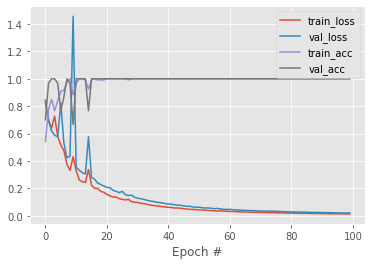

In [32]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

7. Evaluate the Model


In [33]:
# menghitung nilai akurasi model terhadap data test
predictions = model.predict(x_test, batch_size=32)
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=label_list))

              precision    recall  f1-score   support

     Seledri       1.00      1.00      1.00        10
Seledri_Edge       1.00      1.00      1.00        13
       Sirih       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [36]:
# uji model menggunakan image lain
queryPath = imagePaths+'seledri_test.jpg'
query = cv2.imread(queryPath)
output = query.copy()
query = cv2.resize(query, (32, 32)).flatten()
q = []
q.append(query)
q = np.array(q, dtype='float') / 255.0

q_pred = model.predict(q)
i = q_pred.argmax(axis=1)[0]
label = lb.classes_[i]

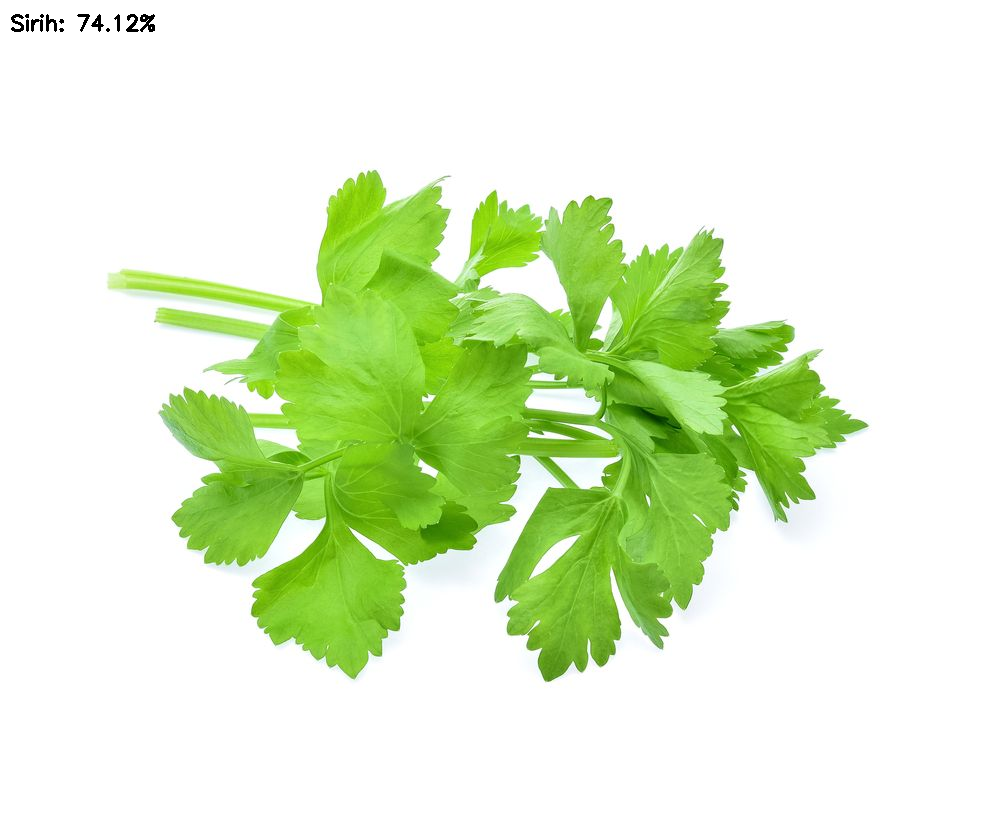

In [37]:
text = "{}: {:.2f}%".format(label, q_pred[0][i] * 100)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)
 
# menampilkan output image
cv2_imshow(output)
# cv2.waitKey() # image tidak akan diclose,sebelum user menekan sembarang tombol
# cv2.destroyWindow('Output') # image akan diclose